In [1]:
# 导入需要的库
import numpy as np
import pandas as pd

## 数据勘查及预处理

鸢尾花数据集说明
- SepalLengthCm  花萼长度
- SepalWidthCm  花萼宽度
- PetalLengthCm  花瓣长度
- PetalWidthCm  花瓣宽度
- Species     鸢尾花品种

In [2]:
# 读取数据 - 鸢尾花数据集
data = pd.read_csv(r'../Datasets/iris.csv')

# 数据基本信息
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [3]:
# 查看全部数据
data.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
125,126,7.2,3.2,6.0,1.8,Iris-virginica
15,16,5.7,4.4,1.5,0.4,Iris-setosa
128,129,6.4,2.8,5.6,2.1,Iris-virginica
52,53,6.9,3.1,4.9,1.5,Iris-versicolor
24,25,4.8,3.4,1.9,0.2,Iris-setosa


In [4]:
# 删除不需要的Id列
data.drop('Id', axis=1, inplace=True)

# 查看是否有重复记录
data.duplicated().any()

# 删除重复记录
data.drop_duplicates(inplace=True)

In [5]:
# 把类别转换为int型
# 感知器的预测结果为1和-1
data['Species'] = data['Species'].map({'Iris-versicolor':0, 'Iris-virginica':1, 'Iris-setosa':-1})

# 选取类别为1和-1的鸢尾花数据，进行二分类
data = data[data['Species'] != 0]

len(data)

97

## 算法实现

In [15]:
# 实现感知器算法，进行二分类
class Perceptron:
    
    """初始化
    
    参数：
        alpha: float 学习率
        times: int 迭代次数
    """
    def __init__(self, alpha, times):
        self.alpha = alpha
        self.times = times
    
    
    """阶跃函数
    
    参数：
        z: 数组类型（或者标量类型）
        根据z的值，返回1或-1，从而实现二分类
    
    返回值：
        int类型
        如果z>=0，返回1，否则返回-1
    """
    def step(self, z):
        return np.where(z>=0, 1, -1)
        # return 1 if z>=0 else -1
    
    
    """训练
    
    参数：
        X: 待训练的样本数据，类数组类型，形状为[样本数量，特征数量]
        y: 每个样本的目标值（标签），类数组类型，形状为[样本数量]
    """
    def fit(self, X, y):
        X = np.asarray(X)
        y = np.asarray(y)
        
        # 创建权重的向量，初始值为0，长度比特征值+1 (截距)
        self.w_ = np.zeros(X.shape[1] + 1)
        
        # 创建损失列表，保存每次迭代后的损失值
        self.loss_ = []
        
        # 按指定循环次数进行迭代
        for i in range(self.times):
            # 逻辑回归是使用所有样本计算梯度，然后更新权重
            # 感知器是使用单个样本依次计算梯度，然后更新权重
            loss = 0
            
            for x, target in zip(X, y):
                # 计算预测值
                y_pre = self.step(np.dot(x, self.w_[1:]) + self.w_[0])
                # 计算损失值
                loss += y_pre != target
                
                # 更新权重：w(j) = w(j) + 学习率 * (真实值 - 预测值) * x(j)
                self.w_[0] += self.alpha * (target - y_pre)
                self.w_[1:] += self.alpha * (target - y_pre) * x
                
            # 将循环中累计的损失值增加到损失列表中
            self.loss_.append(loss)
            
            
    """预测概率
    
    参数：
        X: 待测试的样本数据，类数组类型，形状[样本数量，特征数量]
        
    返回值：
        result: 预测的结果（概率值），数组类型
    """
    def predict_proba(self, X):
        X = np.asarray(X)
        z = np.dot(X, self.w_[1:]) + self.w_[0]
        p = self.sigmoid(z)
        
        # 将预测结果转换为二维数组，便于后续的拼接
        p = p.reshape(-1, 1)
        
        # 将两个数组进行横向拼接
        return np.concatenate([1-p, p], axis=1)
            
            
    """预测分类
    
    参数：
        X: 待测试的样本数据，类数组类型，形状[样本数量，特征数量]
        
    返回值：
        result: 预测的结果（分类值）,数组类型
    """
    def predict(self, X):
        return self.step(np.dot(X, self.w_[1:]) + self.w_[0])

In [16]:
# 构建数据集
d1 = data[data['Species'] == 1]
d2 = data[data['Species'] == -1]
d1 = d1.sample(len(d1), random_state=0)
d2 = d2.sample(len(d2), random_state=0)

# 训练集
train_X = pd.concat([d1.iloc[:40, :-1], d2.iloc[:40, :-1]], axis=0)
train_y = pd.concat([d1.iloc[:40, -1], d2.iloc[:40, -1]], axis=0)

# 测试集
test_X = pd.concat([d1.iloc[40:, :-1], d2.iloc[40:, :-1]], axis=0)
test_y = pd.concat([d1.iloc[40:, -1], d2.iloc[40:, -1]], axis=0)

In [17]:
# 鸢尾花的特征列在同一个数量级，因此不需要进行标准化处理
p = Perceptron(alpha=0.1, times=10)
p.fit(train_X, train_y)
result = p.predict(test_X)

print('预测值：')
display(result)

print('真实值：')
display(test_y.values)

print('权重值：')
display(p.w_)

print('损失值：')
display(p.loss_)

预测值：


array([ 1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1])

真实值：


array([ 1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int64)

权重值：


array([-0.4 , -0.44, -1.44,  1.88,  0.72])

损失值：


[1, 2, 3, 2, 0, 0, 0, 0, 0, 0]

## 数据可视化

In [19]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['font.family'] = 'SimHei'
mpl.rcParams['axes.unicode_minus'] = False

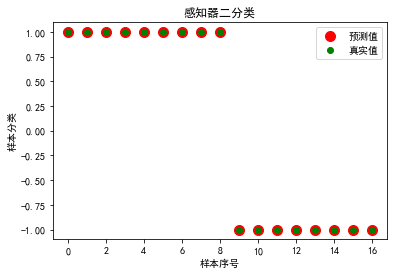

In [20]:
# 绘制预测值
plt.plot(result, 'ro', ms=10, label='预测值')

# 绘制真实值
plt.plot(test_y.values, 'go', label='真实值')

plt.title('感知器二分类')
plt.xlabel('样本序号')
plt.ylabel('样本分类')
plt.legend()
plt.show()

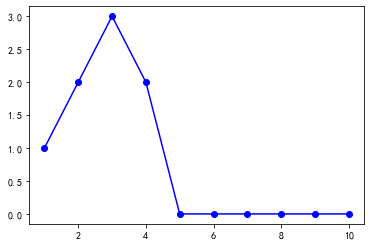

In [21]:
# 绘制目标函数的损失值
plt.plot(range(1, p.times + 1), p.loss_, 'bo-')